This notebook does require some data before usage. Please run `dvc pull` before playing with it! 

In [1]:
DATASET = "enron_spam"
#DATASET = "wiki_pl"
#DATASET = "20_news"

In [2]:
import os
import pickle

import shap


os.chdir("../..") if os.getcwd().endswith("experiments/notebooks") else None

In [3]:
with open(f"data/explanations/{DATASET}/shap_values.pickle", mode="rb") as fd:
    shap_values = pickle.load(fd)

# Explaining single sample

Good to know:
1. Positive impact on the given class is given by positive/red values
2. Negative impact on the class is given by negative/blue values
3. Colors over classes names indicate the prediction (red -> stronger prob)

In [6]:
shap.plots.text(shap_values[1]) # the idx is a number of a sample

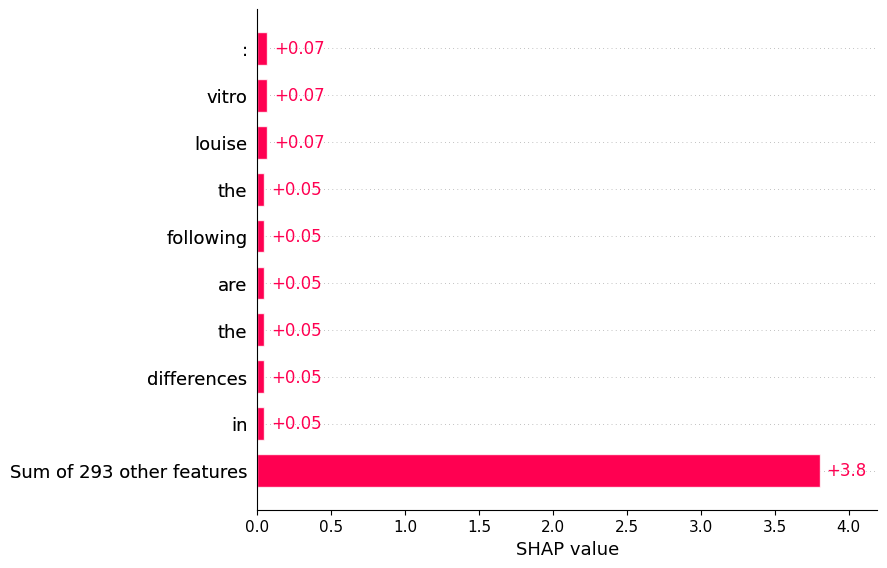

In [120]:
shap.plots.bar(shap_values[0, :, 0], max_display=10, clustering=False) # indexes: first sample (0), all shap values/tokens, class "0"

# Mean explanations

1. The average importance of tokens across all the data (adversarial.jsonl)

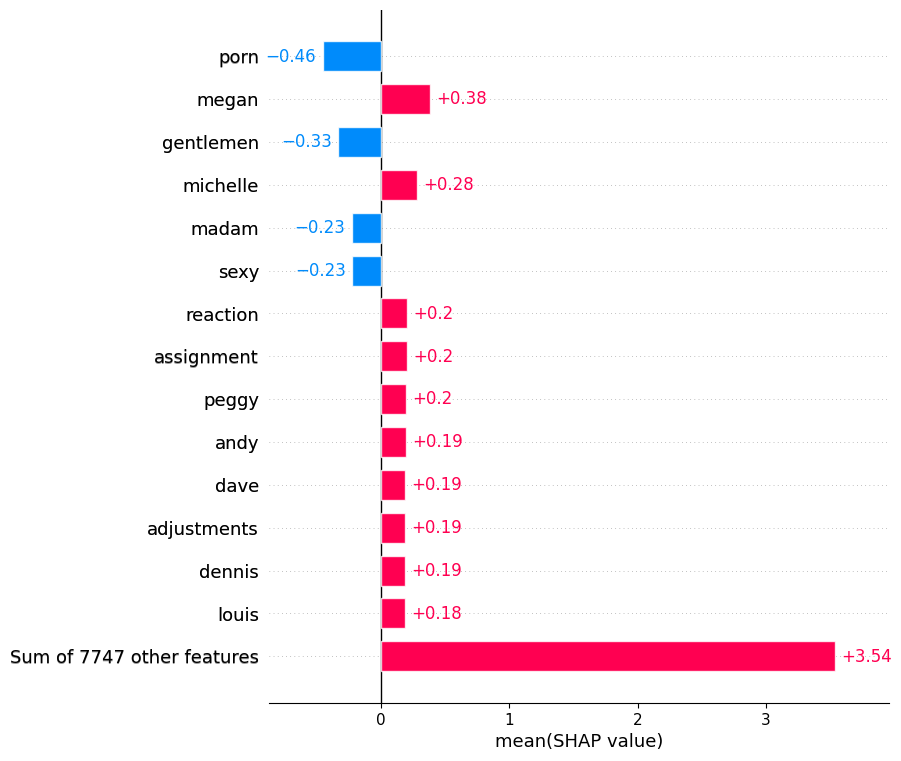

In [26]:
shap.plots.bar(shap_values[:, :, 0].mean(0), max_display=15) # indexes: all samples, all shap values/tokens, class "0"